Environment Setup

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, f1_score, recall_score

In [11]:
pd.options.display.max_columns = None
credit_df = pd.read_csv('Data/Loan Data/Cleaned_Data.csv')
credit_df = credit_df.drop(columns=['Unnamed: 0'])
credit_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,grade: A,grade: B,grade: C,grade: D,grade: E,grade: F,grade: G,home_ownership: ANY,home_ownership: MORTGAGE,home_ownership: NONE,home_ownership: OTHER,home_ownership: OWN,home_ownership: RENT,verification_status: Not Verified,verification_status: Source Verified,verification_status: Verified,pymnt_plan: n,pymnt_plan: y,initial_list_status: f,initial_list_status: w,punctuality,Non Performing
0,5000,5000,4975.0,36,10.65,162.87,10.0,24000.0,27.65,0.0,1.0,3.0,0.0,13648,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,171.62,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,37.0,0
1,2500,2500,2500.0,60,15.27,59.83,1.0,30000.0,1.00,0.0,5.0,3.0,0.0,1687,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,119.66,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,16.0,1
2,2400,2400,2400.0,36,15.96,84.33,10.0,12252.0,8.72,0.0,2.0,2.0,0.0,2956,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,649.91,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,30.0,0
3,10000,10000,10000.0,36,13.49,339.31,10.0,49200.0,20.00,0.0,1.0,10.0,0.0,5598,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,357.48,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,37.0,0
4,3000,3000,3000.0,60,12.69,67.79,1.0,80000.0,17.94,0.0,0.0,15.0,0.0,27783,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,67.79,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,49.0,0


In [12]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465909 entries, 0 to 465908
Data columns (total 49 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   loan_amnt                             465909 non-null  int64  
 1   funded_amnt                           465909 non-null  int64  
 2   funded_amnt_inv                       465909 non-null  float64
 3   term                                  465909 non-null  int64  
 4   int_rate                              465909 non-null  float64
 5   installment                           465909 non-null  float64
 6   emp_length                            465909 non-null  float64
 7   annual_inc                            465909 non-null  float64
 8   dti                                   465909 non-null  float64
 9   delinq_2yrs                           465909 non-null  float64
 10  inq_last_6mths                        465909 non-null  float64
 11  

In [13]:
credit_df['Non Performing'].value_counts()

# We detect an imbalance in target variable that could posiibly affect the model performance

0    410953
1     54956
Name: Non Performing, dtype: int64

In [14]:
low_risk = credit_df[credit_df['Non Performing']==0]
high_risk = credit_df[credit_df['Non Performing']==1]

ratio = round(len(high_risk)/len(low_risk), 2)
print('Target variables are in the ratio', (100-(ratio*100)), ':', ratio*100)

Target variables are in the ratio 87.0 : 13.0


In [16]:
# Resampling the dataset

minority_df = credit_df[credit_df['Non Performing'] == 1]
majority_df = credit_df[credit_df['Non Performing'] == 0]

In [17]:
minority_df = resample(minority_df, replace=True, n_samples=400000, random_state=8)

In [18]:
credit_df_balanced = pd.concat([majority_df, minority_df])

In [19]:
y = credit_df_balanced['Non Performing']
x = credit_df_balanced.drop(columns=['Non Performing'])

In [20]:
# Splitting data into train and test data

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.70, test_size=0.30, random_state=8)

In [21]:
# Fitting model into RandomForestClassifier model

rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=8)
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)

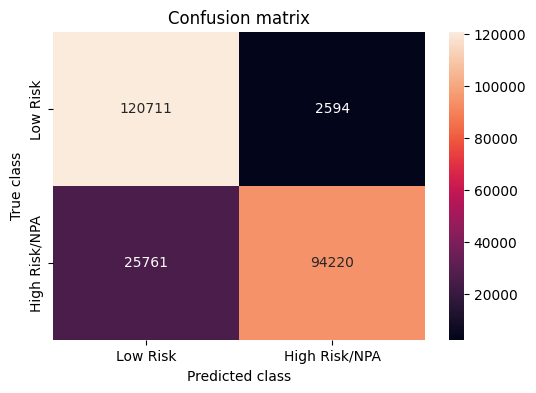

In [22]:
# Visualizing the Confusion matrix

n_errors = (y_pred != Y_test).sum()
LABELS = ['Low Risk', 'High Risk/NPA']
cm = confusion_matrix(Y_test, y_pred.round())
plt.figure(figsize=(6, 4))
sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [26]:
print("Accuracy =", round(accuracy_score(Y_test, y_pred)*100,2), "%")
print(classification_report(Y_test, y_pred))

Accuracy = 88.34 %
              precision    recall  f1-score   support

           0       0.82      0.98      0.89    123305
           1       0.97      0.79      0.87    119981

    accuracy                           0.88    243286
   macro avg       0.90      0.88      0.88    243286
weighted avg       0.90      0.88      0.88    243286



The model made correct predictions 88.34% of the times.

False Positve prediction is low hence precision score is high.
